In [93]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [94]:
df = pd.read_csv("adult.data",header=None)

In [95]:
df.rename(columns= {
    0: "age",
    1: "workclass",
    2: "fnlwgt",
    3: "education",
    4: "education-num",
    5: "marital-status",
    6: "occupation",
    7: "relationship",
    8: "race",
    9: "sex",
    10: "capital-gain",
    11: "capital-loss",
    12: "hours-per-week",
    13: "native-country",
    14: "income"
    
},inplace=True)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [97]:
df["income"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [98]:
df["income"][0]

' <=50K'

In [99]:
valores=[]
for x in df["income"]:
    valores.append(x.strip())

In [100]:
df["income"] = valores

In [101]:
df["income"] = np.where(df["income"]=="<=50K",0,1)

In [102]:
df["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [103]:
df["extras"] = df["capital-gain"]- df["capital-loss"]

In [104]:
df.groupby("workclass")[["extras","hours-per-week"]].mean().sort_values(by="extras",ascending=False)

,extras,hours-per-week
workclass,,
Self-emp-inc,4720.554659,48.818100
Self-emp-not-inc,1769.430146,44.421881
Private,809.209068,40.267096
Local-gov,770.348304,40.982800
Federal-gov,720.963542,41.379167
State-gov,618.442989,39.031587
?,546.035403,31.919390
Without-pay,487.857143,32.714286
Never-worked,0.000000,28.428571


In [105]:
df["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [106]:
valores=[]
for x in df["workclass"]:
    valores.append(x.strip())

In [107]:
df["workclass"]=valores

In [108]:
mapa_trabajo = {
    'State-gov': 'Gobierno estatal',
    'Self-emp-not-inc': 'Autónomo no incorporado',
    'Private': 'Sector privado',
    'Federal-gov': 'Gobierno federal',
    'Local-gov': 'Gobierno local',
    '?': 'Desconocido',
    'Self-emp-inc': 'Autónomo incorporado',
    'Without-pay': 'Sin salario',
    'Never-worked': 'Nunca ha trabajado'
}
 

df["workclass"] = df["workclass"].map(mapa_trabajo)

In [109]:
df["workclass"].value_counts()

workclass
Sector privado             22696
Autónomo no incorporado     2541
Gobierno local              2093
Desconocido                 1836
Gobierno estatal            1298
Autónomo incorporado        1116
Gobierno federal             960
Sin salario                   14
Nunca ha trabajado             7
Name: count, dtype: int64

In [110]:

mapa2 = {
    'Autónomo incorporado':10,
    'Autónomo no incorporado':5,
    'Gobierno local':3,
    'Gobierno federal':2,
    'Gobierno estatal':2,
    'Sector privado':2,
    'Desconocido':1,
    'Sin salario':1,
    'Nunca ha trabajado':1
}
 
df["puesto_ord"] = df["workclass"].map(mapa2)

In [111]:
df["marital-status"].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [112]:
valores=[]
for x in df["marital-status"]:
    valores.append(x.strip())

df["marital-status"]= valores

In [113]:
marit_map = {
    'Never-married': 'Nunca casado/a',
    'Married-civ-spouse': 'Casado/a (civil)',
    'Divorced': 'Divorciado/a',
    'Married-spouse-absent': 'Cónyuge ausente',
    'Separated': 'Separado/a',
    'Married-AF-spouse': 'Casado/a (Fuerzas Armadas)',
    'Widowed': 'Viudo/a'
}

df["marital-status"] = df["marital-status"].map(marit_map)

In [114]:
df = pd.get_dummies(df,columns= ["marital-status"])

In [115]:
df["race"].value_counts()

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

In [116]:
df = pd.get_dummies(df,columns=["race"])

In [117]:
df["occupation"].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [118]:
valores=[]
for x in df["occupation"]:
    valores.append(x.strip())

df["occupation"]= valores

In [119]:
occupation_map = {
    'Adm-clerical': 'Administrativo / Oficina',
    'Exec-managerial': 'Ejecutivo / Gerencial',
    'Handlers-cleaners': 'Manipuladores / Limpiadores',
    'Prof-specialty': 'Profesional / Especialista',
    'Other-service': 'Otros servicios',
    'Sales': 'Ventas',
    'Craft-repair': 'Oficios / Reparaciones',
    'Transport-moving': 'Transporte / Movimiento',
    'Farming-fishing': 'Agricultura / Pesca',
    'Machine-op-inspct': 'Operador / Inspector de máquinas',
    'Tech-support': 'Soporte técnico',
    '?': 'Desconocido / No especificado',
    'Protective-serv': 'Servicios de protección / Seguridad',
    'Armed-Forces': 'Fuerzas armadas',
    'Priv-house-serv': 'Servicio doméstico'
}

df["occupation"]= df["occupation"].map(occupation_map)

In [120]:
df["occupation"].unique()

array(['Administrativo / Oficina', 'Ejecutivo / Gerencial',
       'Manipuladores / Limpiadores', 'Profesional / Especialista',
       'Otros servicios', 'Ventas', 'Oficios / Reparaciones',
       'Transporte / Movimiento', 'Agricultura / Pesca',
       'Operador / Inspector de máquinas', 'Soporte técnico',
       'Desconocido / No especificado',
       'Servicios de protección / Seguridad', 'Fuerzas armadas',
       'Servicio doméstico'], dtype=object)

In [121]:
df.groupby("occupation")[["capital-gain","hours-per-week"]].mean().sort_values(by="capital-gain",ascending=False)

,capital-gain,hours-per-week
occupation,,
Profesional / Especialista,2726.699517,42.386715
Ejecutivo / Gerencial,2262.772996,44.987703
Ventas,1319.829315,40.781096
Servicios de protección / Seguridad,708.098613,42.870570
Soporte técnico,673.552802,39.432112
Oficios / Reparaciones,649.512808,42.304221
Desconocido / No especificado,604.491047,31.906131
Agricultura / Pesca,589.726358,46.989940
Administrativo / Oficina,495.954907,37.558355


In [122]:
oc_map = {
    "Profesional / Especialista":17,
    "Ejecutivo / Gerencial":15,
    "Ventas":10,
    "Servicios de protección / Seguridad":7,
    "Soporte técnico":7,
    "Oficios / Reparaciones":6,
    "Desconocido / No especificado":5,
    "Agricultura / Pesca":5,
    "Administrativo / Oficina":4,
    "Transporte / Movimiento":4,
    "Operador / Inspector de máquinas":3,
    "Servicio doméstico":2,
    "Manipuladores / Limpiadores":2,
    "Otros servicios":1,
    "Fuerzas armadas":0
}


df["occ_ord"] = df["occupation"].map(oc_map)

In [123]:
df= pd.get_dummies(df,columns=["sex"])

In [124]:
df["education-num"].value_counts()

education-num
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: count, dtype: int64

In [125]:
df["educacion_superior"] = np.where(df["education-num"]>=13,1,0)

In [126]:
df["educacion_inferior"] = np.where(df["education-num"]<=9,1,0)

In [127]:
df["edad_ajustada"] = df["age"]*df["education-num"]

In [128]:
df["horas_puesto"] = df["hours-per-week"] * df["occ_ord"]

In [129]:
df["edu_oc"] = df["education-num"] * df["puesto_ord"]

In [130]:
df["rango_edad"] = pd.cut(df["age"], bins=[0, 25, 35, 45, 55, 65,100], labels=False)


In [131]:
df["horas_ord"] = pd.cut(df["hours-per-week"], bins=[0, 25, 40, 60], labels=["Jornada_corta", "Jornada_media", "Jornada_larga"])
df = pd.get_dummies(df, columns=["horas_ord"])

In [144]:
df["age"].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

<Axes: >

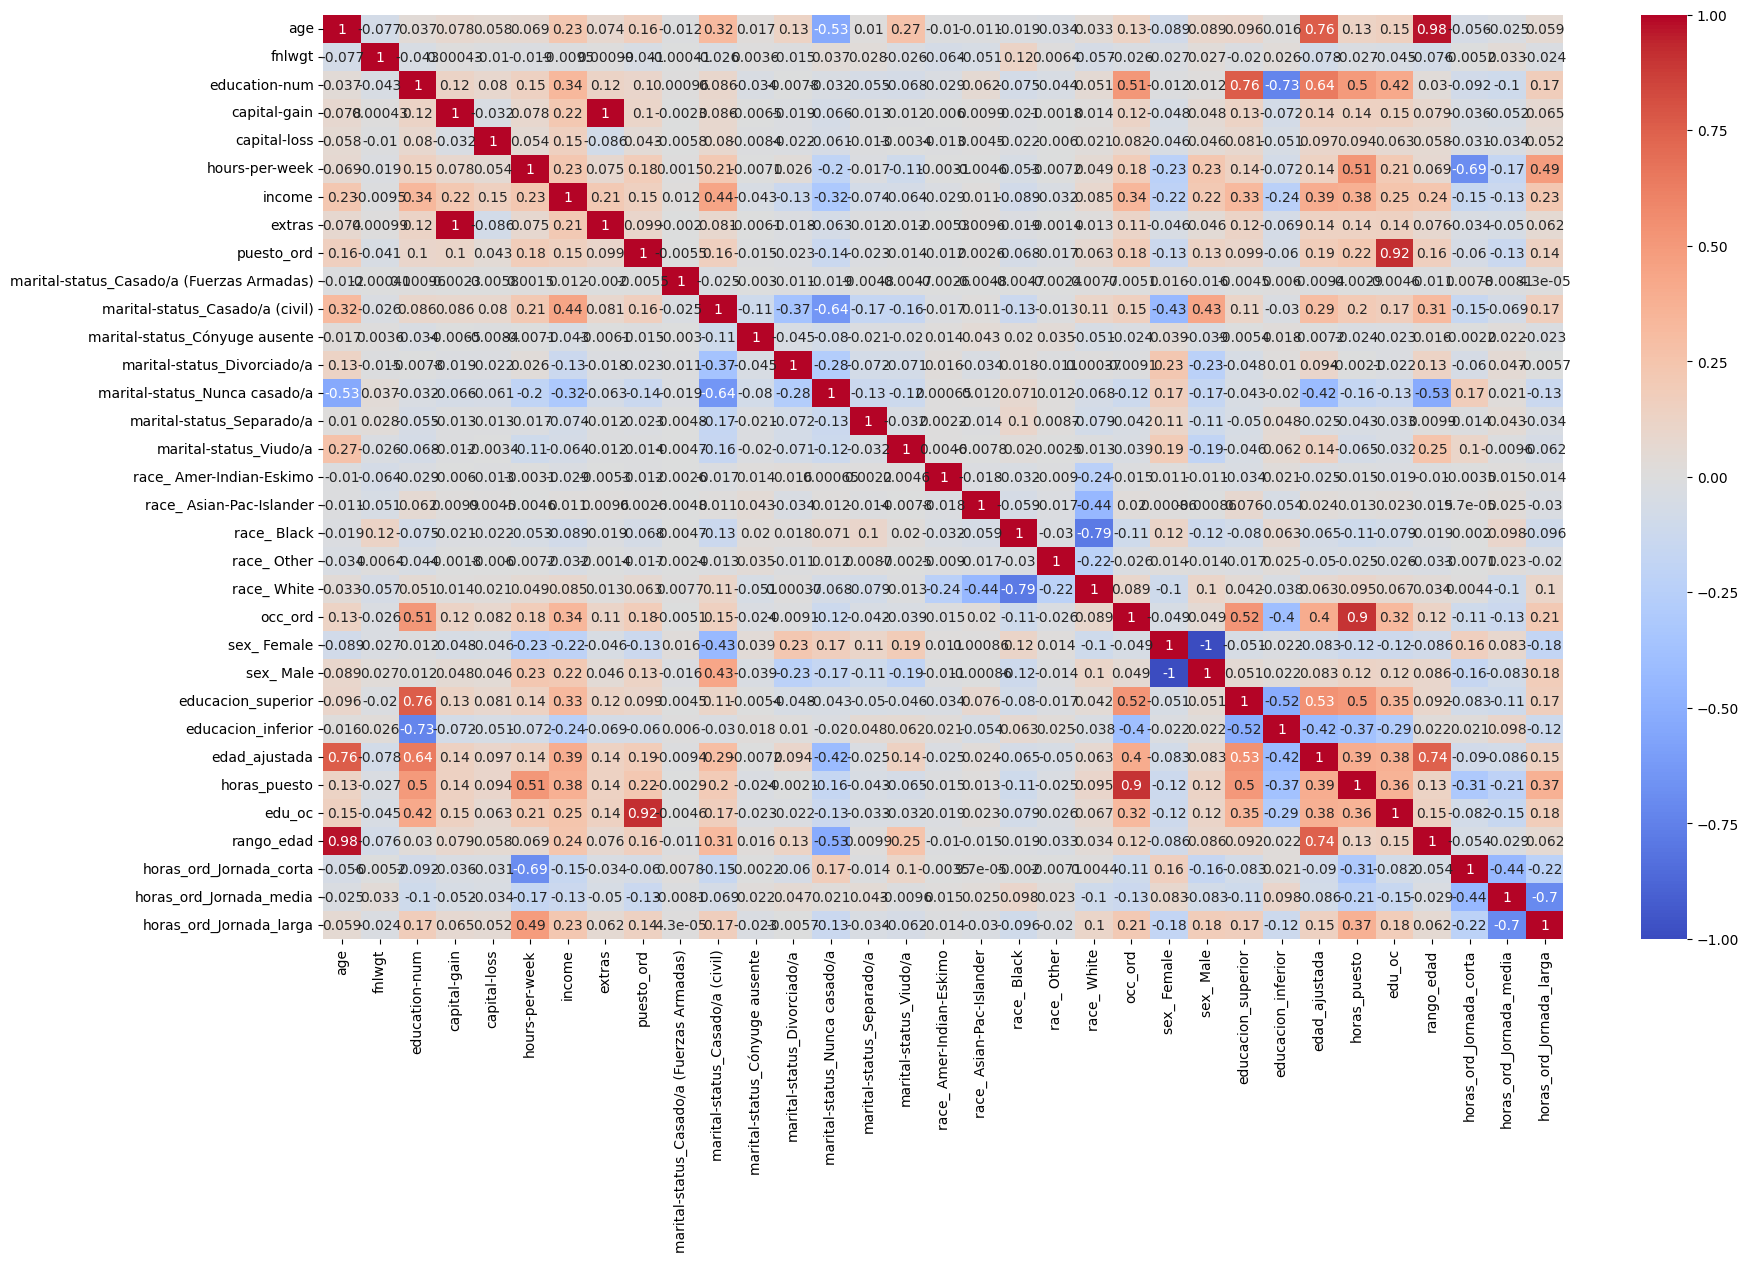

In [133]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(numeric_only=True),annot=True,vmin=-1,cmap="coolwarm")

In [134]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'occupation', 'relationship', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income', 'extras', 'puesto_ord',
       'marital-status_Casado/a (Fuerzas Armadas)',
       'marital-status_Casado/a (civil)', 'marital-status_Cónyuge ausente',
       'marital-status_Divorciado/a', 'marital-status_Nunca casado/a',
       'marital-status_Separado/a', 'marital-status_Viudo/a',
       'race_ Amer-Indian-Eskimo', 'race_ Asian-Pac-Islander', 'race_ Black',
       'race_ Other', 'race_ White', 'occ_ord', 'sex_ Female', 'sex_ Male',
       'educacion_superior', 'educacion_inferior', 'edad_ajustada',
       'horas_puesto', 'edu_oc', 'rango_edad', 'horas_ord_Jornada_corta',
       'horas_ord_Jornada_media', 'horas_ord_Jornada_larga'],
      dtype='object')

In [141]:
df_mod = df[['puesto_ord',"sex_ Male","sex_ Female","age","rango_edad","hours-per-week","educacion_superior","education-num","marital-status_Casado/a (civil)","occ_ord","edad_ajustada","horas_puesto","marital-status_Nunca casado/a","income"]]

In [142]:
df_mod.to_csv("C:/Users/rafac/Proyecto_ML/Data/variables.csv",index=False,encoding='utf-8')